# GRIP: @ The sparks foundation
# Data Science & Business Analytics Internship
# Author: Shashikant suresh sawadh
# Task 03 : Exploratory Data Analysis 'Retail'

This analysis focuses on the sales data of Super Stores around the United States of America. The purpose of this analysis is to understand the profit and loss associated with the different categories of products and its sub-categories sold all over the USA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv(r'C:\Users\sawad\Data Science course\Thes Sparks Foundation\Task-03_EDA- Retail store\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# Exploratory Data Analysis

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

The Super Store has 3 categories of products

# Let's visualize the data

# Baase on Category

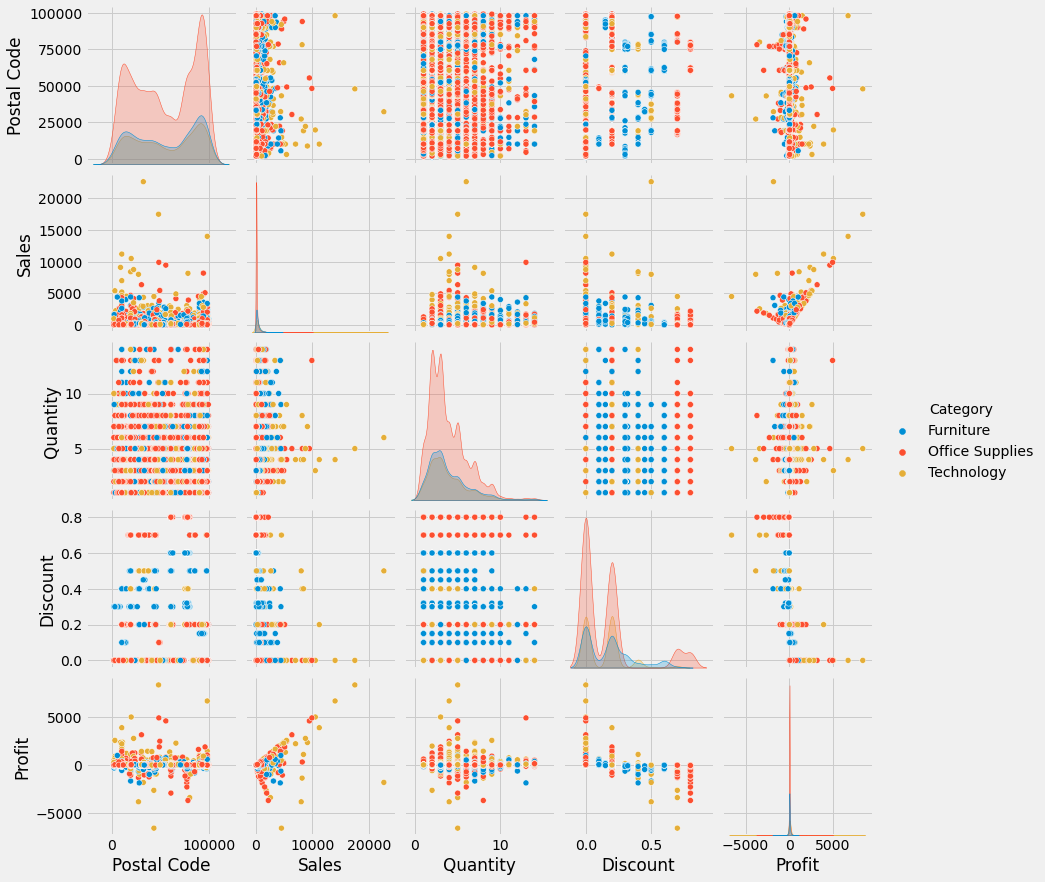

In [30]:
sns.pairplot(df, hue= "Category")

# Baase on Region

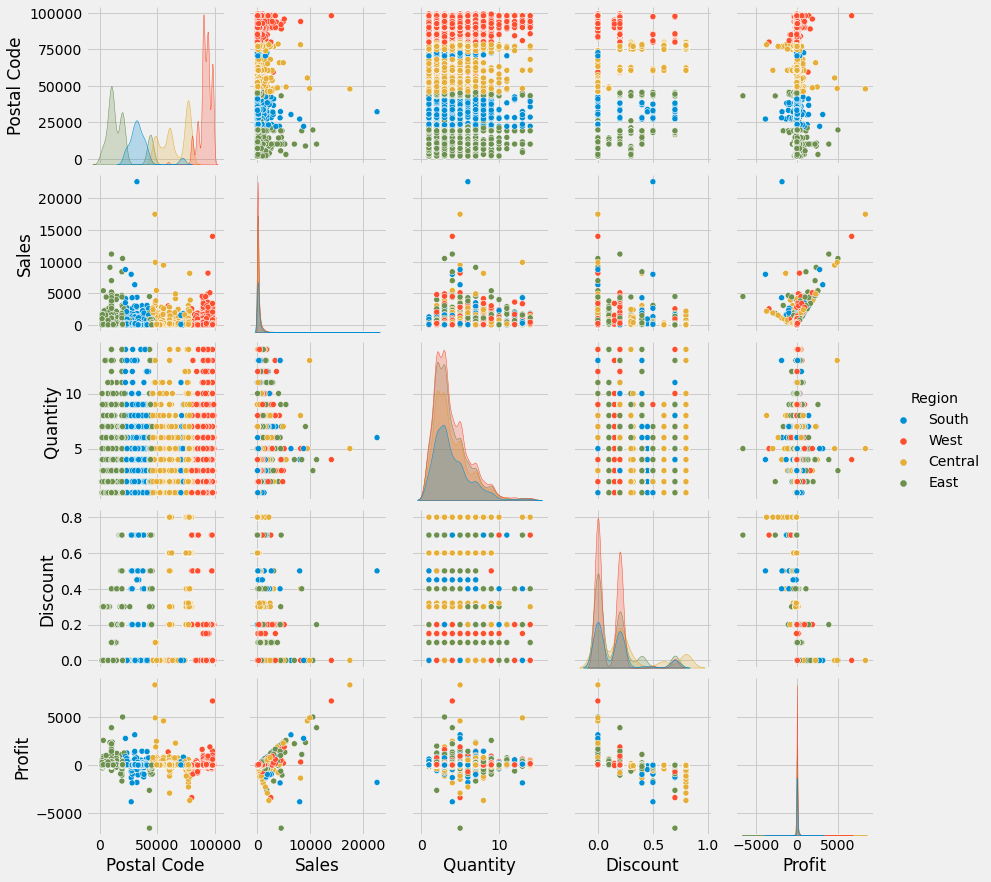

In [31]:
sns.pairplot(df, hue= "Region")

# Let’s now examine the sales and profit by the 3 categories

In [11]:
sales_by_category=df.groupby('Category').sum().reset_index()
sales_by_category['Sales%']=(sales_by_category.Sales/sales_by_category.Sales.sum())*100
sales_by_category['Profit%']=(sales_by_category.Profit/sales_by_category.Profit.sum())*100
display(sales_by_category)

,Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Furniture,118196026,741999.7953,8028,368.89,18451.2728,32.300171,6.442551
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008,31.301008,42.769579
2,Technology,102603754,836154.0330,6939,244.40,145454.9481,36.398821,50.787870


In [12]:
print(' ')
print('Total sales % by Technology is {:.2F}% and profit % is {:.2F}% '.format(sales_by_category['Sales%'][2],sales_by_category['Profit%'][2]))
print('Total sales % by Furniture is {:.2F}% and profit % is {:.2F}% '.format(sales_by_category['Sales%'][0],sales_by_category['Profit%'][0]))
print('Total sales % by Office Supplies is {:.2F}% and profit % is {:.2F}% '.format(sales_by_category['Sales%'][1],sales_by_category['Profit%'][1]))

 
Total sales % by Technology is 36.40% and profit % is 50.79% 
Total sales % by Furniture is 32.30% and profit % is 6.44% 
Total sales % by Office Supplies is 31.30% and profit % is 42.77% 


# Let's visualize the data

Text(0.5, 1.0, 'Profit by Category')

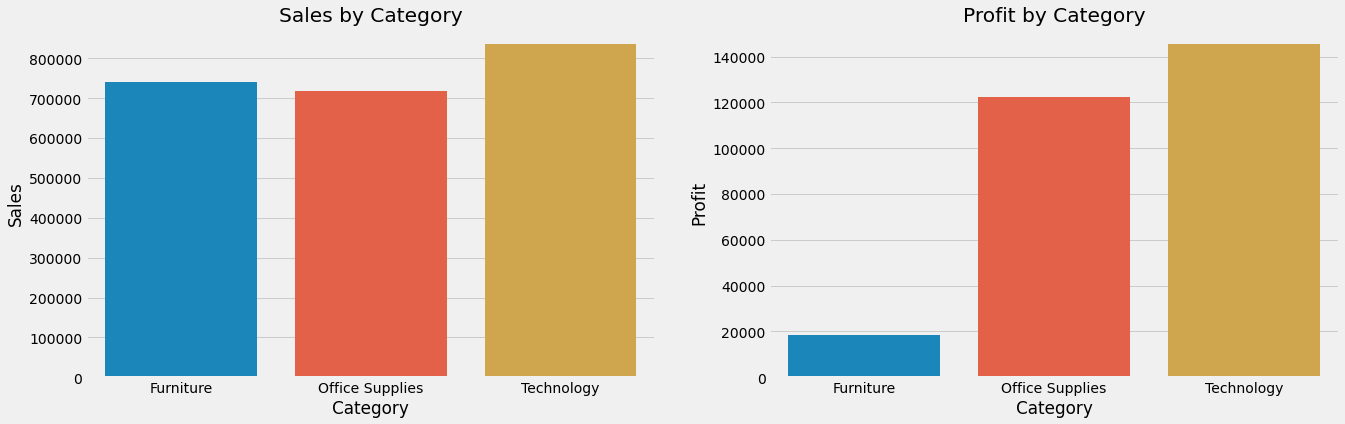

In [15]:
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(sales_by_category.Category,sales_by_category.Sales,ax=ax1)
ax1.set_title("Sales by Category")
sns.barplot(sales_by_category.Category,sales_by_category.Profit,ax=ax2)
ax2.set_title("Profit by Category")

As we can see the Technology category has the highest sales and profit having total sales of 836k dollar and profit of 145K dollar. The Furniture category has a total sales of 741K dollar and profit of 18K dollar The Office Supplies category has a total sales of 719K dollar and profit of 122K dollar

# Let’s now examine the sales and profit by the sub-categories.

In [20]:
sales_by_subcategory=df.groupby('Sub-Category').sum().sort_values(ascending=False,by='Sales').reset_index()
sales_by_subcategory['Sales%']=(sales_by_subcategory.Sales/sales_by_category.Sales.sum())*100
sales_by_subcategory['Profit%']=(sales_by_subcategory.Profit/sales_by_category.Profit.sum())*100
sales_by_subcategory.head()

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Phones,47897175,330007.054,3289,137.40,44515.7306,14.365616,15.543364
1,Chairs,34936229,328449.103,2356,105.00,26590.1663,14.297796,9.284372
2,Storage,46248720,223843.608,3158,63.20,21278.8264,9.744190,7.429835
3,Tables,18607828,206965.532,1241,83.35,-17725.4811,9.009466,-6.189129
4,Binders,83626398,203412.733,5974,567.00,30221.7633,8.854808,10.552401


# visualization

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

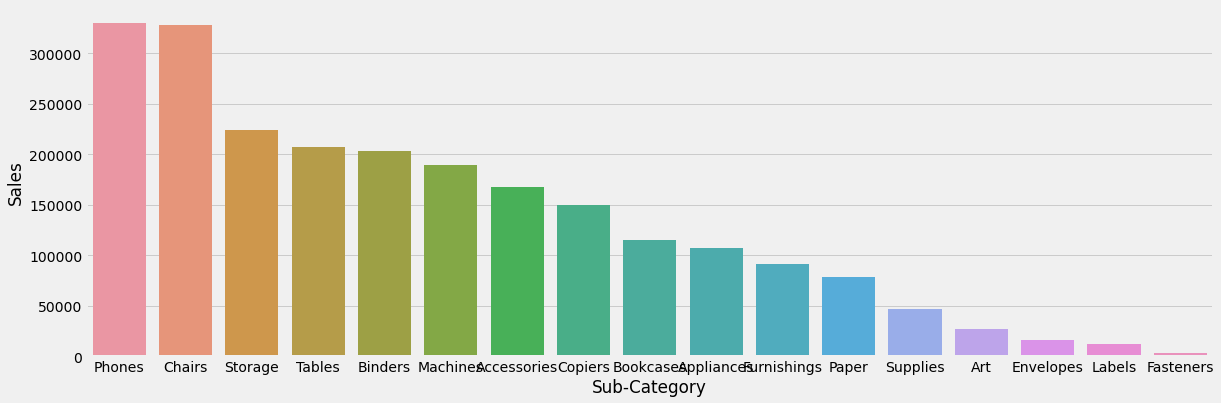

In [21]:
plt.subplots(figsize=(18,6))
sns.barplot(x = "Sub-Category", y = "Sales", data=sales_by_subcategory)

# Profits by sub-categories

In [23]:
profit_by_subcategory=sales_by_subcategory.sort_values(ascending=False,by='Profit').reset_index(drop=True)
profit_by_subcategory.head()

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Copiers,3873477,149528.030,234,11.0,55617.8249,6.509140,19.419834
1,Phones,47897175,330007.054,3289,137.4,44515.7306,14.365616,15.543364
2,Accessories,44468434,167380.318,2976,60.8,41936.6357,7.286273,14.642832
3,Paper,76299221,78479.206,5178,102.6,34053.5693,3.416297,11.890336
4,Binders,83626398,203412.733,5974,567.0,30221.7633,8.854808,10.552401


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

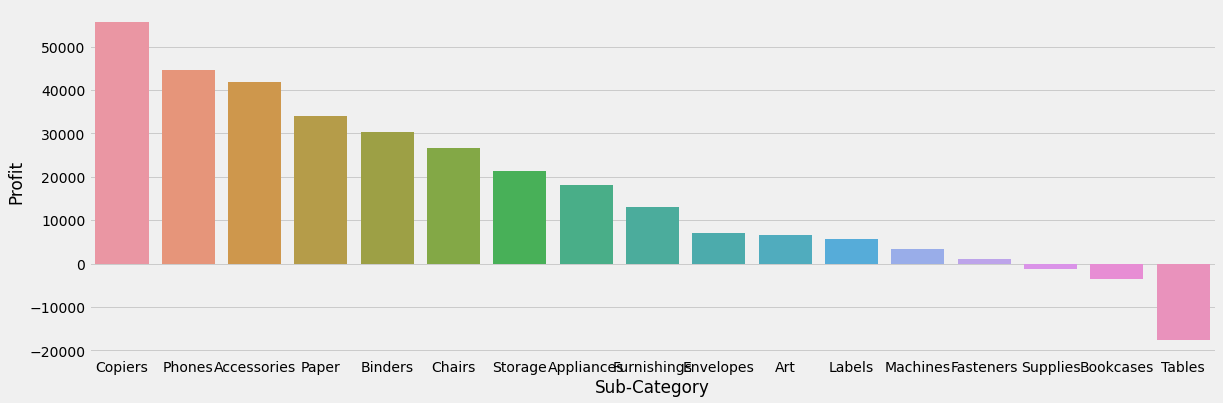

In [24]:
plt.subplots(figsize=(18,6))
sns.barplot(x = "Sub-Category", y = "Profit", data=profit_by_subcategory)

# We have 3 types of Segments: Consumer, Corporate and Home Office

In [25]:
sales_by_segment=df.groupby('Segment').sum().reset_index()
sales_by_segment['Sales%']=(sales_by_segment.Sales/sales_by_category.Sales.sum())*100
sales_by_segment['Profit%']=(sales_by_segment.Profit/sales_by_category.Profit.sum())*100
sales_by_segment

,Segment,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092,50.557240,46.829820
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340,30.739426,32.115953
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785,18.703334,21.054227


Text(0.5, 1.0, 'Profit by segment')

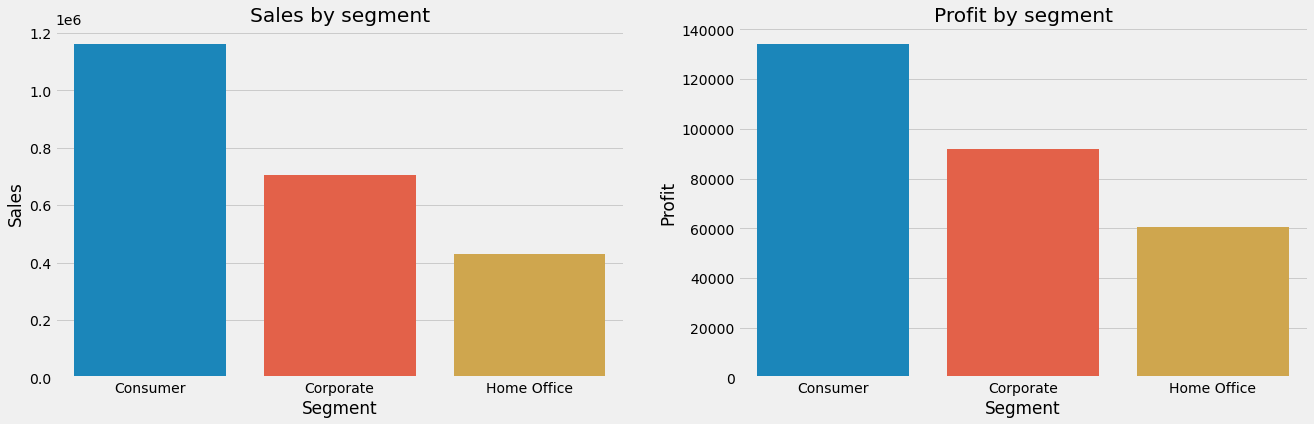

In [27]:
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(sales_by_segment.Segment,sales_by_segment.Sales,ax=ax1)
ax1.set_title("Sales by segment")
sns.barplot(sales_by_segment.Segment,sales_by_segment.Profit,ax=ax2)
ax2.set_title("Profit by segment")

# Let’s now look at the sales and profit by Ship Mode:

In [28]:
shipmode=df.groupby('Ship Mode').sum().reset_index()
shipmode['Sales%']=(shipmode.Sales/sales_by_category.Sales.sum())*100
shipmode['Profit%']=(shipmode.Profit/sales_by_category.Profit.sum())*100
shipmode

,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,First Class,84229511,3.514284e+05,5693,253.17,48969.8399,15.298115,17.098586
1,Same Day,31242093,1.283631e+05,1960,82.75,15891.7589,5.587806,5.548856
2,Second Class,108192588,4.591936e+05,7423,270.15,57446.6354,19.989265,20.058391
3,Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875,59.124814,57.294167


<AxesSubplot:title={'center':'Profit by Ship Mode'}, xlabel='Ship Mode', ylabel='Profit'>

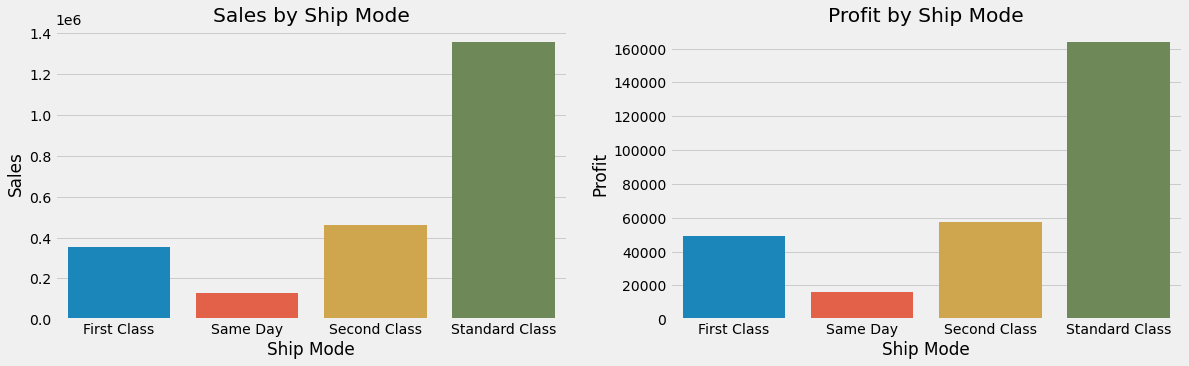

In [29]:
fig=plt.figure(figsize=(18,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(shipmode['Ship Mode'],shipmode.Sales,ax=ax1)
ax1.set_title("Sales by Ship Mode")
sns.barplot(shipmode['Ship Mode'],shipmode.Profit,ax=ax2)
ax2.set_title("Profit by Ship Mode")

sns.barplot(shipmode['Ship Mode'],shipmode.Profit)

# Key Findings and Insights
Looking at the analysis we can say that the Furniture category has a striking low profit margin as compared to the other two categories, even though the Furniture category has more sales than Office Supplies category it’s profit margin is way too low that of Office Supplies. Further analysis on the sub-categories shows us that the Tables and Bookcases have negative profit sales which are under the Furniture category.

We will further investigate to try to determine the root cause for declining profit margin of the Furniture category, predominately focusing on its sub-category Tables and Bookcases.